# Identificação de Refrigerantes

O objetivo é construir um modelo preditivo capaz de identificar um refrigerante a partir das suas características.

Exemplo com base em:
https://github.com/apache/incubator-marvin/blob/develop/public-engines/product-classifier-engine/notebooks/Product_classifier.ipynb

## Configuração

In [0]:
# play settings
INSTALAR_DEPENDENCIAS = True
TREINAMENTO = True
GERAR_DADOS_VISUALIZACAO = True

# to save data as pickle format
CLASSIFIER_FILENAME = 'clf.pkl'
WORDS_FILENAME = 'words.pkl'
COUNT_VECTORIZER_FILENAME = 'vect.pkl'

In [2]:

if INSTALAR_DEPENDENCIAS:  
  # dependencias
  !pip install joblib
  !pip install nltk
  !pip install yellowbrick
  !pip install wordcloud

  # dados
  import nltk
  nltk.download('punkt')
  nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Aquisição e Limpeza

In [3]:
!unzip -P cofip -o train_dataset.zip

Archive:  train_dataset.zip
  inflating: train_dataset.csv       


In [4]:
import pandas as pd

# arquivo
initial_dataset_raw = pd.read_csv("train_dataset.csv", delimiter=";", encoding='utf-8')
initial_dataset_raw.head()

,id,descricao,ano_referencia,cod_cfop,cod_cnae,cod_destinatario,cod_emitente,cod_produto_contribuinte,cod_uf_destinatario,desconto,preco,quantidade,segmento_economico,valor_bruto,valor_unitario,unidade_medida,valor_icms,valor_ipi_trib,cod_st,cod_orig,vlr_unit_com,vlr_frete,vlr_ipi_trib,vlr_seguro,vlr_outro,vlr_ii,vlr_desp_adu_ii,vlr_iof_ii,vlr_aliquota_icms,vlr_aliquota_ipi,cod_cest,produto_id
0,593036227,REFRIGERANTE COCA COLA PET 2 LITROS,2015,5929,4711302.0,1,2,00000000002359,23,0.0,4061.841756,1.0,8,4061.841756,4061.841756,UN,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,64484
1,593036228,REFRIGERANTE COCA COLA PET 2 LITROS,2014,5929,4711302.0,1,2,00000000002359,23,0.0,4431.100097,2.0,8,8862.200195,4431.100097,UN,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,64484
2,593036229,REFRIGERANTE COCA COLA PET 2 LITROS,2015,5929,4711302.0,1,2,00000000002359,23,0.0,4061.841756,1.0,8,4061.841756,4061.841756,UN,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,64484
3,593036230,REFRIGERANTE COCA COLA PET 2 LITROS,2014,5929,4711302.0,1,2,00000000002359,23,0.0,4431.100097,2.0,8,8862.200195,4431.100097,UN,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,64484
4,593036231,REFRIGERANTE COCA COLA PET 2 LITROS,2015,5929,4711302.0,1,2,00000000002359,23,0.0,4523.414683,1.0,8,4523.414683,4523.414683,UN,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,64484


In [5]:
initial_dataset = initial_dataset_raw[["descricao", "produto_id"]]
initial_dataset.head()

,descricao,produto_id
0,REFRIGERANTE COCA COLA PET 2 LITROS,64484
1,REFRIGERANTE COCA COLA PET 2 LITROS,64484
2,REFRIGERANTE COCA COLA PET 2 LITROS,64484
3,REFRIGERANTE COCA COLA PET 2 LITROS,64484
4,REFRIGERANTE COCA COLA PET 2 LITROS,64484


In [6]:
initial_dataset.tail()

,descricao,produto_id
169755,GASOLINA DT CLEAN L,312612
169756,GASOLINA DT CLEAN L,312612
169757,GASOLINA DT CLEAN L,312612
169758,GASOLINA DT CLEAN L,312612
169759,GASOLINA DT CLEAN L,312612


### Apenas Refrigerantes

In [7]:
refri = initial_dataset[initial_dataset['descricao'].str.contains("REFRI")]
refri.head()

,descricao,produto_id
0,REFRIGERANTE COCA COLA PET 2 LITROS,64484
1,REFRIGERANTE COCA COLA PET 2 LITROS,64484
2,REFRIGERANTE COCA COLA PET 2 LITROS,64484
3,REFRIGERANTE COCA COLA PET 2 LITROS,64484
4,REFRIGERANTE COCA COLA PET 2 LITROS,64484


In [0]:
initial_dataset = refri

In [9]:
initial_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3916 entries, 0 to 12979
Data columns (total 2 columns):
descricao     3916 non-null object
produto_id    3916 non-null int64
dtypes: int64(1), object(1)
memory usage: 91.8+ KB


In [10]:
initial_dataset.produto_id.value_counts()

64484     100
18097      90
64772      80
138686     80
64435      70
64480      70
263735     60
64440      60
82781      60
64787      50
258978     50
64487      50
263958     50
55769      40
141983     40
258997     40
17725      40
17331      40
82865      40
82706      40
73108      40
259040     40
16107      40
159343     40
64954      30
16211      30
25949      30
16178      30
195553     30
198049     30
         ... 
81731      10
31398      10
81673      10
81667      10
16123      10
20728      10
81593      10
82319      10
20891      10
64970      10
49633      10
222155     10
64456      10
64450      10
82857      10
64394      10
64388      10
64364      10
64342      10
111433     10
82751      10
82737      10
84712      10
84666      10
17525      10
84584      10
49707      10
266789     10
258974     10
81561       1
Name: produto_id, Length: 224, dtype: int64

## Visualização

In [11]:
refrigerante_coca_cola_pet_2l = initial_dataset[initial_dataset.produto_id == 64484]
refrigerante_coca_cola_pet_2l.head()

,descricao,produto_id
0,REFRIGERANTE COCA COLA PET 2 LITROS,64484
1,REFRIGERANTE COCA COLA PET 2 LITROS,64484
2,REFRIGERANTE COCA COLA PET 2 LITROS,64484
3,REFRIGERANTE COCA COLA PET 2 LITROS,64484
4,REFRIGERANTE COCA COLA PET 2 LITROS,64484


In [12]:

from nltk.corpus import stopwords
from wordcloud import WordCloud
import joblib

refrigerante_coca_cola_pet_2l_words = ''

if GERAR_DADOS_VISUALIZACAO:
  for i, val in enumerate(refrigerante_coca_cola_pet_2l.descricao):
    print('.', end='')
    if (i + 1) % 40 == 0 or i == len(refrigerante_coca_cola_pet_2l.descricao) - 1:
      print('{:.2f} %'.format(i/(len(refrigerante_coca_cola_pet_2l.descricao)-1)*100))
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('portuguese')]
    for words in tokens:
      refrigerante_coca_cola_pet_2l_words = refrigerante_coca_cola_pet_2l_words + words + ' '

  joblib.dump(refrigerante_coca_cola_pet_2l_words, WORDS_FILENAME)

else:
  refrigerante_coca_cola_pet_2l_words = joblib.load(WORDS_FILENAME) 
       
        
refrigerante_coca_cola_pet_2l_wordcloud = WordCloud(width=600, height=400).generate(refrigerante_coca_cola_pet_2l_words)

........................................39.39 %
........................................79.80 %
....................100.00 %


In [13]:
refrigerante_coca_cola_pet_2l_words[:200]

'refrigerante coca cola pet 2 litros refrigerante coca cola pet 2 litros refrigerante coca cola pet 2 litros refrigerante coca cola pet 2 litros refrigerante coca cola pet 2 litros refrigerante coca co'

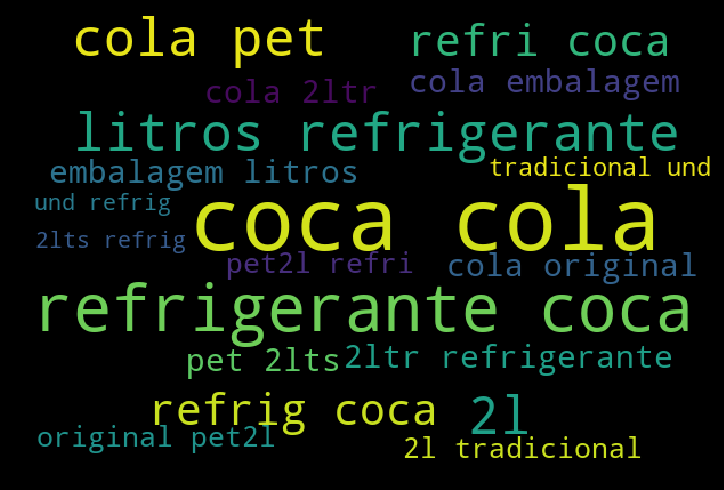

In [14]:
import matplotlib.pyplot as plt

# Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(refrigerante_coca_cola_pet_2l_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Treinamento

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(
    initial_dataset["descricao"], 
    initial_dataset["produto_id"], 
    test_size = 0.2, 
    random_state = 10
)

In [17]:
X_train[:5]

4770        REFRIGERANTE SODA ANTARCTICA 350ML
2128          REFRI. COCA COLA ZERO LATA 350ML
81                      REFRI COCA COLA PET 2L
9891    REFRIG DE CAJU SAO GERALDO 250ML FD 12
9822                    REFRIG KUAT EKO PET 2L
Name: descricao, dtype: object

In [18]:
X_test[:5]

6258            REFRIGERA DE CAJU SAO GERALDO 250ML
8750                       REFRIG FREVO 2L COLA FD6
9549                  REFRIG INDAIA LARANJA 2L FD 6
10123                REFRIGERANTE COLA 250ML INDAIA
9245     REFRIG. PITCHULA FREVO GUAR. 12 X 250ML FD
Name: descricao, dtype: object

In [19]:
y_train[:5]

4770    83402
2128    64487
81      64484
9891    64554
9822    29598
Name: produto_id, dtype: int64

In [20]:
y_test[:5]

6258      64954
8750      65078
9549      64495
10123     40524
9245     203301
Name: produto_id, dtype: int64

In [0]:
vect = CountVectorizer()

if TREINAMENTO:
  vect.fit(initial_dataset["descricao"])
  joblib.dump(vect, COUNT_VECTORIZER_FILENAME)  

vect = joblib.load(COUNT_VECTORIZER_FILENAME)

In [0]:
final_dataset = {
    "X_train": vect.transform(X_train),
    "X_test": vect.transform(X_test),
    "y_train": y_train,
    "y_test" : y_test,
    "vect": vect
}

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
clf = MultinomialNB()

if TREINAMENTO:
  clf.fit(final_dataset["X_train"], final_dataset["y_train"])
  joblib.dump(clf, CLASSIFIER_FILENAME)  

clf = joblib.load(CLASSIFIER_FILENAME)
  
model = {
    "clf" : clf,
    "vect": final_dataset["vect"]
}

## Métricas

In [0]:
from sklearn.metrics import accuracy_score

In [26]:
y_prediction = model["clf"].predict(final_dataset["X_test"])

accuracy = accuracy_score(y_prediction, final_dataset["y_test"])
accuracy

0.7806122448979592

In [0]:
from sklearn.metrics import classification_report

In [28]:
report = classification_report(final_dataset["y_test"], y_prediction)
print(report)

              precision    recall  f1-score   support

       15656       1.00      1.00      1.00         1
       15809       1.00      1.00      1.00         1
       16107       0.78      1.00      0.88         7
       16123       0.00      0.00      0.00         2
       16178       1.00      1.00      1.00         7
       16211       0.33      1.00      0.50         4
       17254       0.00      0.00      0.00         2
       17331       1.00      1.00      1.00        12
       17525       1.00      1.00      1.00         3
       17725       0.75      1.00      0.86         6
       17907       1.00      1.00      1.00         2
       17916       1.00      1.00      1.00         1
       18097       0.59      1.00      0.75        22
       18490       1.00      1.00      1.00         2
       18830       1.00      1.00      1.00         2
       18866       1.00      1.00      1.00         2
       19103       0.00      0.00      0.00         5
       19724       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Predição

In [29]:
produto_predicao = [('REFRIG SPRITE 350ML LA1', 16107),
                    ('REFRIG COCA COLA 2 5L', 25949),
                    ('REFRI SUKITA LARANJA LT 350ML', 18866)]
labels = ['descricao', 'produto_id']
df_predicao = pd.DataFrame.from_records(produto_predicao, columns=labels)
df_predicao.head()

,descricao,produto_id
0,REFRIG SPRITE 350ML LA1,16107
1,REFRIG COCA COLA 2 5L,25949
2,REFRI SUKITA LARANJA LT 350ML,18866


In [30]:
input_message = model["vect"].transform(df_predicao["descricao"].values)

final_prediction = model["clf"].predict(input_message)                                                  
final_prediction


array([138686,  25949,  18866])

In [31]:
report = classification_report(df_predicao["produto_id"].values, final_prediction)

print(report)

              precision    recall  f1-score   support

       16107       0.00      0.00      0.00         1
       18866       1.00      1.00      1.00         1
       25949       1.00      1.00      1.00         1
      138686       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.50      0.50         3
weighted avg       0.67      0.67      0.67         3



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
